In [16]:
import pandas as pd
import sqlite3
import requests
import numpy as np
import folium
import folium.plugins 
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS
from sklearn import cluster 
from sklearn.cluster import dbscan, cluster_optics_dbscan

In [65]:
con = sqlite3.connect('Campsite_data_4k.db')
query = ''' SELECT * FROM Venues'''
completed_venues = pd.read_sql_query(query,con).drop('index',axis=1)
query = ''' SELECT Campsite_Name, Latitude, Longitude FROM Sites WHERE Campsite_Name like '%RV%' AND Campsite_Name not like '%closed%'   '''
df_RV = pd.read_sql_query(query,con).drop_duplicates()
con.close()
Camp_sites_onehot = pd.get_dummies(completed_venues[['Venue_Category']], prefix="", prefix_sep="")
Camp_sites_onehot['Latitude'] = completed_venues['Latitude']
Camp_sites_onehot = Camp_sites_onehot[[Camp_sites_onehot.columns[-1]] + list(Camp_sites_onehot.columns[:-1])]
campsite_grouped = Camp_sites_onehot.groupby('Latitude').mean().reset_index()
campsite_grouped_clustering = campsite_grouped.drop('Latitude', 1)
campsite_grouped

,Latitude,ATM,Accessories Store,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airfield,Airport,Airport Food Court,...,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,23.686356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,23.701440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,24.150010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016667,0.0
3,24.568251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,24.582099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4853,64.832576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4854,64.835300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4855,64.839585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4856,64.962006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [3]:
range_for_test = list(range(2,30))
opticsModel={}

for minSamples in range_for_test:
    opticsModel[minSamples] = OPTICS(min_samples=minSamples).fit(campsite_grouped_clustering.to_numpy())

/home/theia/.local/lib/python3.6/site-packages/sklearn/cluster/_optics.py:807: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
/home/theia/.local/lib/python3.6/site-packages/sklearn/cluster/_optics.py:807: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
/home/theia/.local/lib/python3.6/site-packages/sklearn/cluster/_optics.py:807: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
/home/theia/.local/lib/python3.6/site-packages/sklearn/cluster/_optics.py:807: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
/home/theia/.local/lib/python3.6/site-packages/sklearn/cluster/_optics.py:807: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
/home/theia/.local/lib/python3

In [4]:
result = []
for minSamples in range_for_test:
    print("Min Samples: {}, Number of groups: {}".format(minSamples,opticsModel[minSamples].labels_.max()+1))
    result.append(opticsModel[minSamples].labels_.max())

Min Samples: 2, Number of groups: 686
Min Samples: 3, Number of groups: 216
Min Samples: 4, Number of groups: 106
Min Samples: 5, Number of groups: 44
Min Samples: 6, Number of groups: 30
Min Samples: 7, Number of groups: 20
Min Samples: 8, Number of groups: 14
Min Samples: 9, Number of groups: 11
Min Samples: 10, Number of groups: 5
Min Samples: 11, Number of groups: 5
Min Samples: 12, Number of groups: 3
Min Samples: 13, Number of groups: 2
Min Samples: 14, Number of groups: 2
Min Samples: 15, Number of groups: 2
Min Samples: 16, Number of groups: 1
Min Samples: 17, Number of groups: 1
Min Samples: 18, Number of groups: 1
Min Samples: 19, Number of groups: 1
Min Samples: 20, Number of groups: 1
Min Samples: 21, Number of groups: 1
Min Samples: 22, Number of groups: 1
Min Samples: 23, Number of groups: 1
Min Samples: 24, Number of groups: 1
Min Samples: 25, Number of groups: 1
Min Samples: 26, Number of groups: 1
Min Samples: 27, Number of groups: 1
Min Samples: 28, Number of groups: 

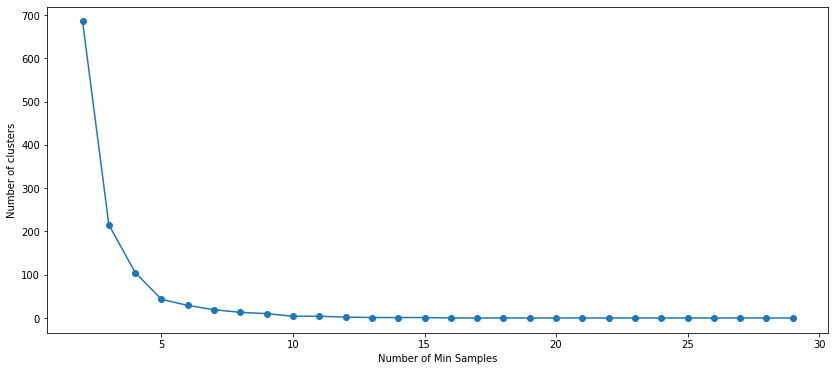

In [5]:
plt.figure(figsize=(14,6))
plt.plot(range_for_test,result, '-o')
plt.xlabel(r'Number of Min Samples')
plt.ylabel('Number of clusters')
plt.show()

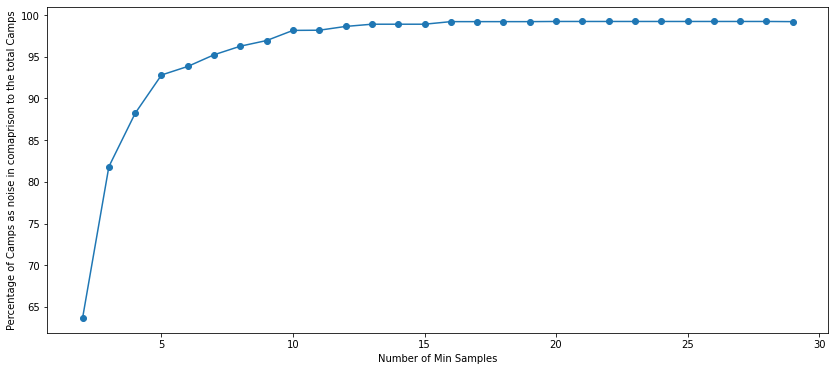

In [6]:
total_noise_calc = []
for i in range_for_test:
    a = pd.DataFrame(opticsModel[i].labels_)
    a = a[a[0]<0].count()[0]/a.count()[0]*100
    total_noise_calc.append(a)
plt.figure(figsize=(14,6))
plt.plot(range_for_test,total_noise_calc, '-o')
plt.xlabel(r'Number of Min Samples')
plt.ylabel('Percentage of Camps as noise in comaprison to the total Camps')
plt.show()

## Let's choose the min samples of and eps value by evaluating the model further

In [52]:
range_for_test_eps = list(range(1,70,1))
for i in list(range(0,len(range_for_test_eps),1)):
    range_for_test_eps[i] = range_for_test_eps[i]/100
    
eps_opt_result=[]
    
min_sample_range = range_for_test
    
for i in min_sample_range:
    i_dict={}
    i_dict['min sample size'] = i
    i_dict['model'] = opticsModel[i]
    i_dict['eps'] = {}
    for it_eps in range_for_test_eps:
        i_dict['eps'][str(it_eps*100)] = cluster_optics_dbscan(reachability=opticsModel[i].reachability_,
                                       core_distances=opticsModel[i].core_distances_,
                                       ordering=opticsModel[i].ordering_, eps=it_eps)
    
    eps_opt_result.append(i_dict)
#for instance in opticsModel:
    

In [54]:
for instance in eps_opt_result:
    print("Min Sample Size: {}, Groups: {}".format(instance['min sample size'],instance['model'].labels_.max()+1))
    for i in instance['eps']:
        noise = pd.DataFrame(instance['model'].labels_)
        noise = noise[noise[0]<0].count()[0]/noise.count()[0]*100
        print("Groups: {}, ammount of noise (%): {}, eps: {}".format(pd.DataFrame(instance['eps'][i])[0].max()+1,noise,i))

Min Sample Size: 2, Groups: 686
Groups: 182, ammount of noise (%): 63.668176204199256, eps: 1.0
Groups: 188, ammount of noise (%): 63.668176204199256, eps: 2.0
Groups: 210, ammount of noise (%): 63.668176204199256, eps: 3.0
Groups: 231, ammount of noise (%): 63.668176204199256, eps: 4.0
Groups: 272, ammount of noise (%): 63.668176204199256, eps: 5.0
Groups: 294, ammount of noise (%): 63.668176204199256, eps: 6.0
Groups: 330, ammount of noise (%): 63.668176204199256, eps: 7.000000000000001
Groups: 357, ammount of noise (%): 63.668176204199256, eps: 8.0
Groups: 377, ammount of noise (%): 63.668176204199256, eps: 9.0
Groups: 399, ammount of noise (%): 63.668176204199256, eps: 10.0
Groups: 424, ammount of noise (%): 63.668176204199256, eps: 11.0
Groups: 443, ammount of noise (%): 63.668176204199256, eps: 12.0
Groups: 443, ammount of noise (%): 63.668176204199256, eps: 13.0
Groups: 379, ammount of noise (%): 63.668176204199256, eps: 14.000000000000002
Groups: 328, ammount of noise (%): 63.6

## Let's continue with a min sample size of 5 and an EPS of 1

In [64]:
chosen_model = eps_opt_result[3]
chosen_model_groups = chosen_model['eps']['1.0']
chosen_model_groups

array([-1, -1, -1, ..., -1, -1, -1])

In [66]:
campsite_grouped.insert(0, 'DBSCAN_Cluster_Labels', chosen_model_groups)
df_RV = df_RV.reset_index().set_index('Latitude')
campsite_grouped = campsite_grouped.set_index('Latitude')

In [67]:
df_RV['DBSCAN_Cluster_Labels'] = campsite_grouped['DBSCAN_Cluster_Labels']
df_RV = df_RV.reset_index()
df_RV

,Latitude,index,Campsite_Name,Longitude,DBSCAN_Cluster_Labels
0,44.030277,0,10 Acres Campground and RV Park,-73.403468,-1.0
1,26.145834,1,1015 RV Park,-97.958195,-1.0
2,51.415188,2,11 Bridges Campground and RV Park,-112.632344,-1.0
3,58.716979,3,115 Creek Rest Area (no services),-124.912576,NaN
4,62.387044,4,1202 Motor Inn and RV Park,-140.873463,-1.0
...,...,...,...,...,...
5306,37.236637,5306,Zion RV and Campground,-112.856060,NaN
5307,37.231969,5307,Zion West RV Park,-113.364556,NaN
5308,37.170192,5308,Zion's Gate RV Resort,-113.373832,NaN
5309,35.224768,5309,Zuni Village RV Park,-114.014515,NaN


In [68]:
df_RV.groupby('DBSCAN_Cluster_Labels').count()

,Latitude,index,Campsite_Name,Longitude
DBSCAN_Cluster_Labels,,,,
-1.0,4779,4779,4779,4779
0.0,10,10,10,10
1.0,5,5,5,5
2.0,6,6,6,6
3.0,35,35,35,35
4.0,9,9,9,9
5.0,5,5,5,5
6.0,9,9,9,9
7.0,5,5,5,5


In [69]:
# create map of RV parks using latitude and longitude values
latitude = df_RV['Latitude'].mean()
longitude = df_RV['Longitude'].mean()
map_national_RV_parks_clusters = {}
for cluster in df_RV.groupby('DBSCAN_Cluster_Labels').count().reset_index()['DBSCAN_Cluster_Labels'].tolist():
    
    map_national_RV_parks_clusters[cluster] = folium.Map(location=[latitude, longitude], zoom_start=4)

    # add markers to map
    marker_cluster_clusters = {}
    marker_cluster_clusters[cluster] = folium.plugins.MarkerCluster().add_to(map_national_RV_parks_clusters[cluster])
    for lat, lng, name in zip(df_RV[df_RV['DBSCAN_Cluster_Labels']==cluster]['Latitude'], df_RV[df_RV['DBSCAN_Cluster_Labels']==cluster]['Longitude'], df_RV.reset_index()[df_RV['DBSCAN_Cluster_Labels']==cluster]['Campsite_Name']):
        label = "<a  target='_blank' href='https://www.google.com/search?q={}'>{}</a>".format(name.replace(' ','%20'),name)
        #label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(marker_cluster_clusters[cluster])  

    map_national_RV_parks_clusters[cluster].save('DBSCAN/Cluster {} from analysis.html'.format(cluster))

In [70]:
df_RV = df_RV.drop('index',axis=1)

In [71]:
con = sqlite3.connect('Campsite_data_4k.db')
df_RV.to_sql('DBSCAN',con,if_exists='replace')
campsite_grouped.reset_index().to_sql('DBSCAN_grouped',con,if_exists='replace')
con.close()

/home/theia/.local/lib/python3.6/site-packages/pandas/core/generic.py:2615: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [74]:
con = sqlite3.connect('Campsite_data_4k.db')
query = ''' SELECT * FROM DBSCAN'''
df_RV_DBSCAN = pd.read_sql_query(query,con).drop('index',axis=1)
query = ''' SELECT * FROM DBSCAN_grouped'''
df_RV_DBSCAN_grouped = pd.read_sql_query(query,con).drop('index',axis=1)
con.close()

In [75]:
df_RV_DBSCAN

,Latitude,Campsite_Name,Longitude,DBSCAN_Cluster_Labels
0,44.030277,10 Acres Campground and RV Park,-73.403468,-1.0
1,26.145834,1015 RV Park,-97.958195,-1.0
2,51.415188,11 Bridges Campground and RV Park,-112.632344,-1.0
3,58.716979,115 Creek Rest Area (no services),-124.912576,NaN
4,62.387044,1202 Motor Inn and RV Park,-140.873463,-1.0
...,...,...,...,...
5306,37.236637,Zion RV and Campground,-112.856060,NaN
5307,37.231969,Zion West RV Park,-113.364556,NaN
5308,37.170192,Zion's Gate RV Resort,-113.373832,NaN
5309,35.224768,Zuni Village RV Park,-114.014515,NaN


In [76]:
list(range(0,int(df_RV_DBSCAN['DBSCAN_Cluster_Labels'].max())+1,1))

[0, 1, 2, 3, 4, 5, 6, 7]

In [78]:
df_DBSCAN = {}
df_DBSCAN_grouped = {}
df_DBSCAN_stats = {}
for cluster in list(range(0,int(df_RV_DBSCAN['DBSCAN_Cluster_Labels'].max())+1,1)):
    df_DBSCAN[cluster] = df_RV_DBSCAN[df_RV_DBSCAN['DBSCAN_Cluster_Labels'] == cluster]
    df_DBSCAN_grouped[cluster] = df_RV_DBSCAN_grouped[df_RV_DBSCAN_grouped['DBSCAN_Cluster_Labels'] == cluster]
    cols = (df_DBSCAN_grouped[cluster] != 0).any()
    try:
        df_DBSCAN_grouped[cluster] = df_DBSCAN_grouped[cluster][cols[cols].index]
        df_DBSCAN_stats[cluster] = df_DBSCAN_grouped[cluster].drop(['DBSCAN_Cluster_Labels','Latitude'],1).describe().T.sort_values(by='mean', ascending=False)
    except:
        pass
        #df_Kmeans_stats[cluster] = df_Kmeans_grouped[cluster].drop(['Kmeans_Cluster_Labels','Latitude'],1).describe().T.sort_values(by='mean', ascending=False)
    print("Cluster number: {}, cluster size: {}, number of venue types: {}".format(cluster, df_DBSCAN_grouped[cluster].shape[0], df_DBSCAN_grouped[cluster].shape[1]-1))

Cluster number: 0, cluster size: 10, number of venue types: 18
Cluster number: 1, cluster size: 5, number of venue types: 7
Cluster number: 2, cluster size: 6, number of venue types: 4
Cluster number: 3, cluster size: 35, number of venue types: 2
Cluster number: 4, cluster size: 9, number of venue types: 2
Cluster number: 5, cluster size: 5, number of venue types: 2
Cluster number: 6, cluster size: 9, number of venue types: 2
Cluster number: 7, cluster size: 5, number of venue types: 2


In [80]:
for i in df_DBSCAN_stats:
    print("Group: {}, DF: {}".format(i,df_DBSCAN_stats[i]))

Group: 1, DF:                       count      mean  std       min       25%       50%  \
Convenience Store       5.0  0.166667  0.0  0.166667  0.166667  0.166667   
Fast Food Restaurant    5.0  0.166667  0.0  0.166667  0.166667  0.166667   
Golf Course             5.0  0.166667  0.0  0.166667  0.166667  0.166667   
Hotel                   5.0  0.166667  0.0  0.166667  0.166667  0.166667   
Pizza Place             5.0  0.166667  0.0  0.166667  0.166667  0.166667   
RV Park                 5.0  0.166667  0.0  0.166667  0.166667  0.166667   

                           75%       max  
Convenience Store     0.166667  0.166667  
Fast Food Restaurant  0.166667  0.166667  
Golf Course           0.166667  0.166667  
Hotel                 0.166667  0.166667  
Pizza Place           0.166667  0.166667  
RV Park               0.166667  0.166667  
Group: 2, DF:                 count      mean  std       min       25%       50%       75%  \
Campground        6.0  0.333333  0.0  0.333333  0.333333  

## From visually inspecting the groups the only one that seems truly like a group is group number 3 - Let's inspect it further

In [82]:
df_RV_DBSCAN

,Latitude,Campsite_Name,Longitude,DBSCAN_Cluster_Labels
0,44.030277,10 Acres Campground and RV Park,-73.403468,-1.0
1,26.145834,1015 RV Park,-97.958195,-1.0
2,51.415188,11 Bridges Campground and RV Park,-112.632344,-1.0
3,58.716979,115 Creek Rest Area (no services),-124.912576,NaN
4,62.387044,1202 Motor Inn and RV Park,-140.873463,-1.0
...,...,...,...,...
5306,37.236637,Zion RV and Campground,-112.856060,NaN
5307,37.231969,Zion West RV Park,-113.364556,NaN
5308,37.170192,Zion's Gate RV Resort,-113.373832,NaN
5309,35.224768,Zuni Village RV Park,-114.014515,NaN


In [92]:
Group_3 = {}
Group_3['RV'] = df_RV_DBSCAN[df_RV_DBSCAN['DBSCAN_Cluster_Labels'] == 3]
Group_3['grouped'] = df_RV_DBSCAN_grouped[df_RV_DBSCAN_grouped['DBSCAN_Cluster_Labels'] == 3]
cols = (Group_3['grouped'] != 0).any()
Group_3['stats'] = Group_3['grouped'][cols[cols].index]
Group_3['stats']

,Latitude,DBSCAN_Cluster_Labels,Campground
603,30.118930,3,1.0
776,30.651961,3,1.0
871,31.201854,3,1.0
874,31.267295,3,1.0
1198,32.645681,3,1.0
1544,33.515333,3,1.0
1581,33.657361,3,1.0
1694,34.055466,3,1.0
1764,34.433726,3,1.0
2119,35.558572,3,1.0


DBSCAN just didn't work - it would seem that the camp sites are just not similar enough to one another